In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

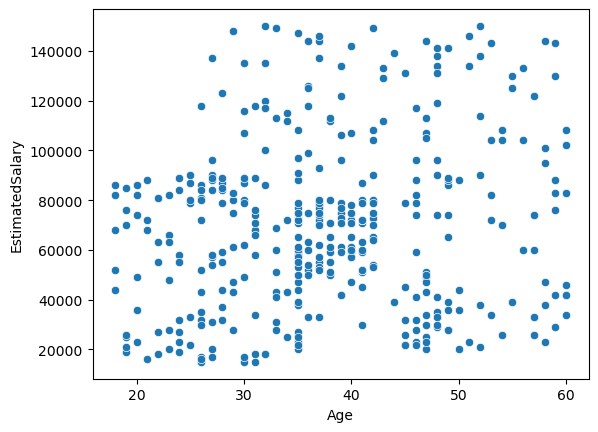

In [7]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\skjha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4979 - loss: 685.2299 - val_accuracy: 0.4000 - val_loss: 139.7144
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3922 - loss: 175.4917 - val_accuracy: 0.6000 - val_loss: 17.7603
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5092 - loss: 98.4963 - val_accuracy: 0.6000 - val_loss: 219.9074
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6517 - loss: 63.7618 - val_accuracy: 0.4000 - val_loss: 101.3681
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4717 - loss: 88.0909 - val_accuracy: 0.4000 - val_loss: 95.1794
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4654 - loss: 67.1138 - val_accuracy: 0.6000 - val_loss: 13.9891
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5058 - loss: 31.4232 - val_accuracy: 0.4000 - val_loss: 19.6569
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5327 - loss: 19.6182 - val

In [16]:
# as we can see the val_accurcay is between 0.4 - 0.6. this is the problem of having dataset with different scale

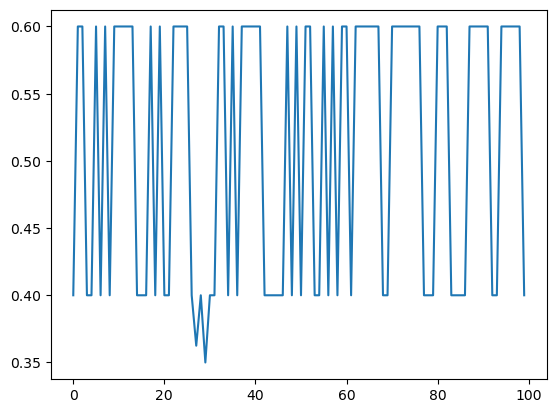

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# # Applying scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

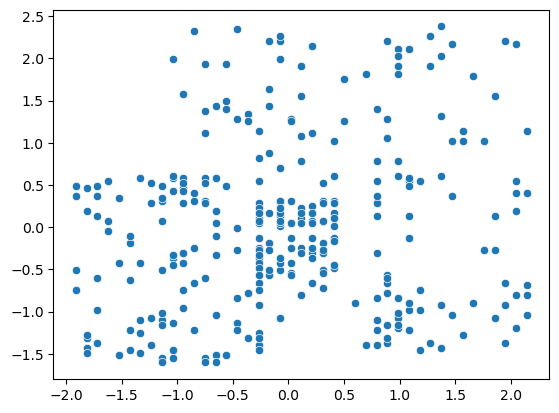

In [21]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [22]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


C:\Users\skjha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3325 - loss: 0.7092 - val_accuracy: 0.6625 - val_loss: 0.6615
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7564 - loss: 0.6493 - val_accuracy: 0.8375 - val_loss: 0.6079
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8183 - loss: 0.6052 - val_accuracy: 0.8000 - val_loss: 0.5609
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8374 - loss: 0.5637 - val_accuracy: 0.8000 - val_loss: 0.5203
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8194 - loss: 0.5229 - val_accuracy: 0.8000 - val_loss: 0.4851
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8328 - loss: 0.5023 - val_accuracy: 0.8000 - val_loss: 0.4540
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8659 - loss: 0.4541 - val_accuracy: 0.8250 - val_loss: 0.4263
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8784 - loss: 0.4405 - val_accuracy: 0.8250 - val_loss: 0

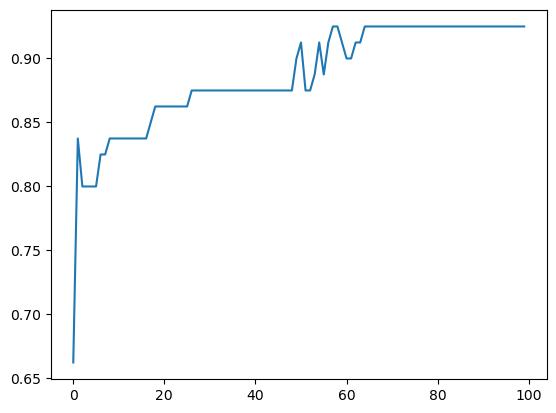

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])